## Question 1: Denoising with Autoencoders

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - loss: 0.6011 - val_loss: 0.5713
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - loss: 0.5687 - val_loss: 0.5685
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - loss: 0.5666 - val_loss: 0.5666
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - loss: 0.5651 - val_loss: 0.5659
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - loss: 0.5649 - val_loss: 0.5653
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - loss: 0.5645 - val_loss: 0.5655
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - loss: 0.5637 - val_loss: 0.5647
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - loss: 0.5631 - val_loss: 0.5640
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - loss: 0.5643 - val_loss: 0.5638
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - loss: 0.5627 - val_loss: 0.5649
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - loss: 0.5630 - val_loss: 0.5645
Epoch 12/20
391/391

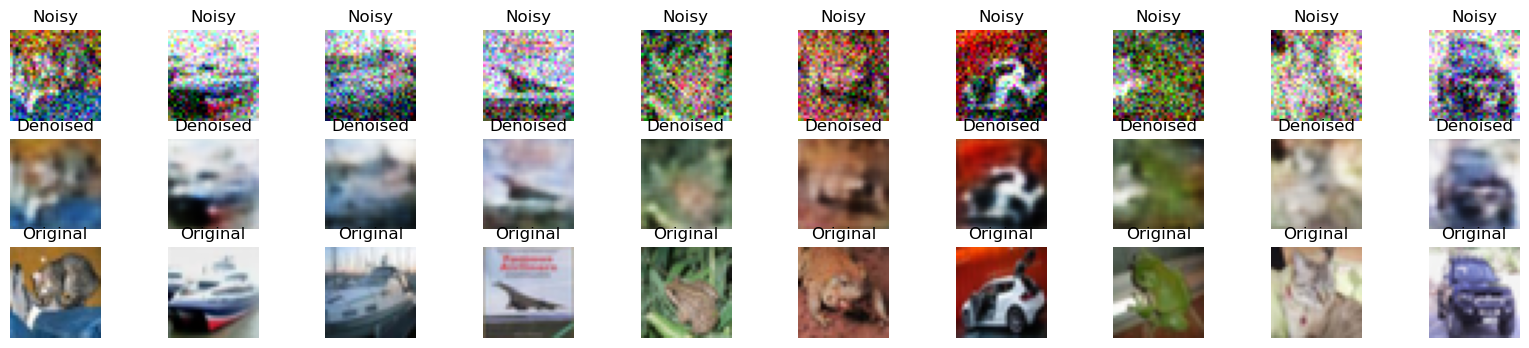

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255., x_test.astype('float32') / 255.

# Add noise
noise_factor = 0.2
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape), 0., 1.)

# Build the autoencoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
autoencoder.summary()

# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Visualize results
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    ax.set_title("Noisy")
    plt.axis('off')

    # Cleaned images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.set_title("Denoised")
    plt.axis('off')

    # Original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    ax.set_title("Original")
    plt.axis('off')
plt.show()


## Question 2: CIFAR-10 Image Reconstruction with VAE

In [137]:
pip install torch torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [112]:
# import the nessessary libraries 

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [116]:
# Load CIFAR-10 Dataset

In [118]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:36<00:00, 4.70MB/s]


In [119]:
 # Define VAE Architecture

In [122]:
class VAE(nn.Module):
    def __init__(self, latent_dim=128):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(512, latent_dim)
        self.fc_logvar = nn.Linear(512, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 32 * 32 * 3),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [124]:
# Define Loss Function (VAE Loss)

In [127]:
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 32*32*3), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [129]:
# Train the VAE

In [131]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader.dataset):.4f}")

Epoch 1, Loss: 1989.6179
Epoch 2, Loss: 1943.7239
Epoch 3, Loss: 1923.5003
Epoch 4, Loss: 1904.7455
Epoch 5, Loss: 1888.4434
Epoch 6, Loss: 1881.1743
Epoch 7, Loss: 1874.1051
Epoch 8, Loss: 1870.2389
Epoch 9, Loss: 1866.3453
Epoch 10, Loss: 1864.7025
Epoch 11, Loss: 1863.2099
Epoch 12, Loss: 1861.1409
Epoch 13, Loss: 1859.2673
Epoch 14, Loss: 1857.3901
Epoch 15, Loss: 1855.6099
Epoch 16, Loss: 1852.8781
Epoch 17, Loss: 1850.9334
Epoch 18, Loss: 1849.8213
Epoch 19, Loss: 1849.1429
Epoch 20, Loss: 1847.6271


In [132]:
# Visualize Reconstructions

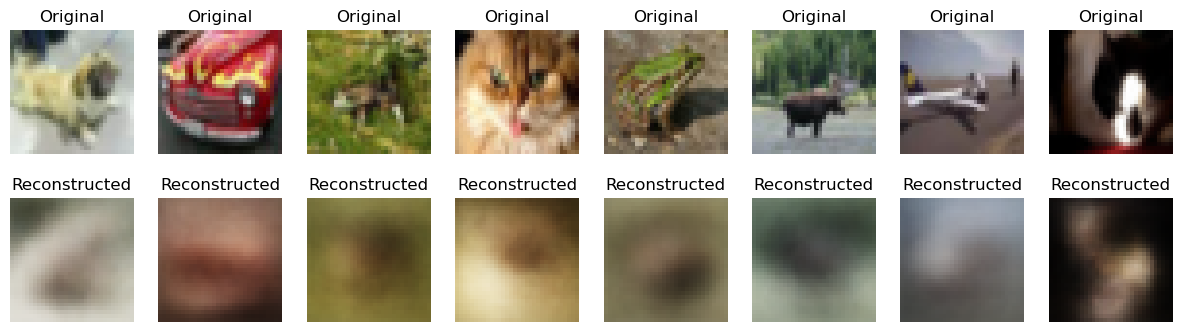

In [133]:
def show_reconstructions(model, data_loader):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)
    images = images.to(device)
    with torch.no_grad():
        recon_images, _, _ = model(images)
    recon_images = recon_images.view(-1, 3, 32, 32).cpu()

    fig, axes = plt.subplots(2, 8, figsize=(15, 4))
    for i in range(8):
        axes[0, i].imshow(images[i].permute(1, 2, 0).cpu())
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        axes[1, i].imshow(recon_images[i].permute(1, 2, 0))
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')
    plt.show()

show_reconstructions(model, train_loader)

--------------------------------------------------------------------
                  ASSIGNMENT COMPLETED
--------------------------------------------------------------------